<a href="https://colab.research.google.com/github/Rakesh00966/Tracking-Student-Well-Being/blob/main/Tracking_Student_Well_Being.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking Student Well-Being

<img src="https://github.com/Rakesh00966/Tracking-Student-Well-Being/blob/main/Gemini.png?raw=true" width="1800">


## Notebook Summary

This notebook performed the following steps:

1.  **Data Loading**: Loaded the `StressLevelDataset.csv` into a pandas DataFrame.
2.  **Initial Data Inspection**: Checked for null values, data types, shape, and duplicated values. Displayed descriptive statistics of the data.
3.  **Data Visualization (Histograms)**: Generated histograms to visualize the distribution of key numeric features (`anxiety_level`, `self_esteem`, and `depression`).
4.  **Correlation Analysis**: Calculated and visualized the correlation matrix of the features, including the correlation with the target variable `stress_level`.
5.  **Data Splitting**: Divided the dataset into training and testing sets (80/20 split).
6.  **Feature Scaling**: Applied StandardScaler to scale the features in the training and testing sets.
7.  **Model Training and Optimization**: Trained and optimized several classification models (Gradient Boosting, Random Forest, Logistic Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Classifier) using RandomizedSearchCV with Stratified K-Fold cross-validation.
8.  **Model Evaluation**: Evaluated the trained models based on metrics like Accuracy, F1-Score, Recall, Precision, and ROC-AUC.
9.  **Best Model Selection**: Identified the Logistic Regression model as the best performing model based on the F1-Score.
10. **Classification Report**: Generated a classification report for the best model.
11. **Model Saving**: Saved the best performing model to a file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)

In [4]:
df = pd.read_csv('/content/StressLevelDataset.csv')
df.sample(4)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
592,5,15,1,7,0,3,1,1,3,5,...,1,1,1,4,3,1,2,5,5,2
968,4,29,0,6,1,2,5,1,2,3,...,4,5,2,5,1,3,2,2,1,0
187,3,29,0,5,1,2,5,1,2,4,...,4,5,1,5,1,3,1,2,1,0
52,6,29,0,0,1,2,4,2,1,4,...,5,5,2,5,1,3,2,2,1,0


In [6]:
pd.set_option('display.max_columns', None)
df.sample(4)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
377,4,28,0,4,1,2,5,2,1,3,5,5,5,2,4,1,3,2,2,1,0
181,20,6,1,23,3,3,1,3,4,2,1,1,2,4,2,5,1,4,5,4,2
679,11,23,0,12,2,1,3,4,3,2,3,2,3,3,2,3,3,3,3,2,1
659,11,23,1,12,2,1,2,2,3,3,2,2,3,2,3,2,3,2,2,3,1


In [11]:
print("*********** Checking Null values ***********\n")
print(df.isnull().sum())
print("\n*********** Checking Data Types ***********\n")
print(df.dtypes)
print("\n*********** Checking Shape ***********\n")
print(df.shape)
print("\n*********** Checking Duplicated vales ***********")
print(df.duplicated().sum())
print("\n*********** Checking Info ***********\n")
print(df.info())
print("\n*********** Checking Describe ***********\n")
print(df.describe().T)

*********** Checking Null values ***********

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

*********** Checking Data Types ***********

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                     

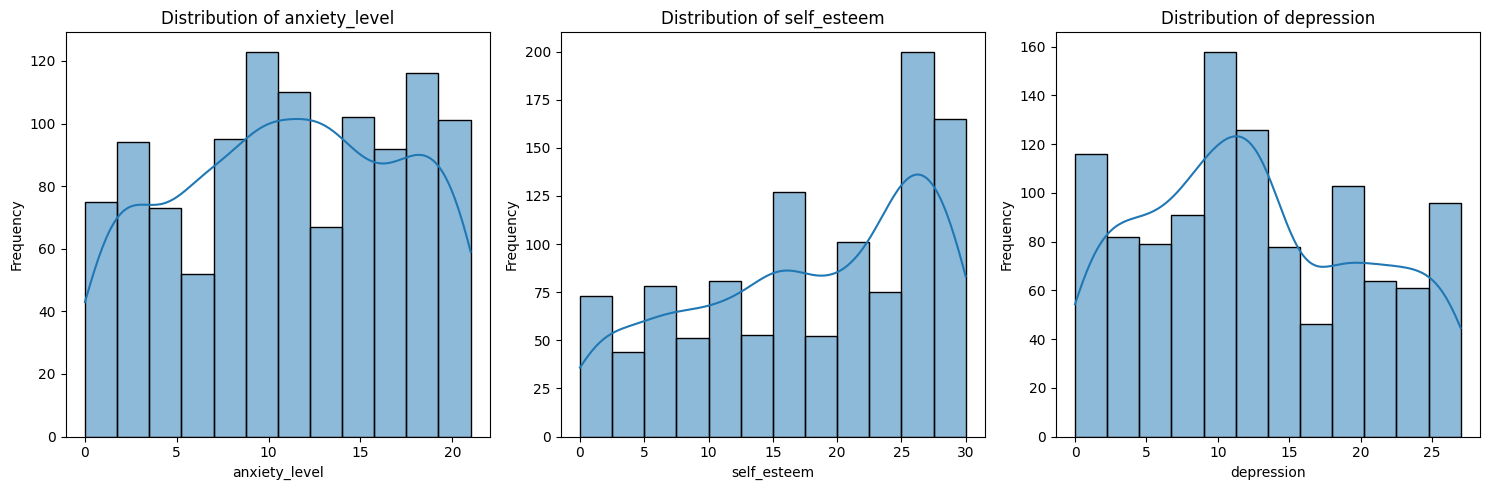

In [13]:
# Select specific numeric columns for plotting
numeric_cols = ['anxiety_level', 'self_esteem', 'depression']

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols


# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot histograms for each selected numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Understanding The Data
### Feature Descriptions

*   **anxiety_level**: Level of anxiety reported by the student.
*   **self_esteem**: Student's self-esteem score.
*   **mental_health_history**: Indicates if the student has a history of mental health issues (0 or 1).
*   **depression**: Level of depression reported by the student.
*   **headache**: Frequency or severity of headaches reported by the student.
*   **blood_pressure**: Blood pressure level of the student.
*   **sleep_quality**: Quality of sleep reported by the student.
*   **breathing_problem**: Indicates if the student has breathing problems (0 or 1).
*   **noise_level**: Level of noise in the student's living environment.
*   **living_conditions**: Quality of the student's living conditions.
*   **safety**: Feeling of safety in the student's environment.
*   **basic_needs**: Access to basic needs for the student.
*   **academic_performance**: Student's academic performance level.
*   **study_load**: Amount of study load experienced by the student.
*   **teacher_student_relationship**: Quality of the relationship between the teacher and student.
*   **future_career_concerns**: Level of concern about future career prospects.
*   **social_support**: Level of social support received by the student.
*   **peer_pressure**: Level of peer pressure experienced by the student.
*   **extracurricular_activities**: Involvement in extracurricular activities.
*   **bullying**: Experience with bullying (0 or 1).
*   **stress_level**: The target variable, indicating the student's stress level.

In [16]:
corr_matrix = df.corr()

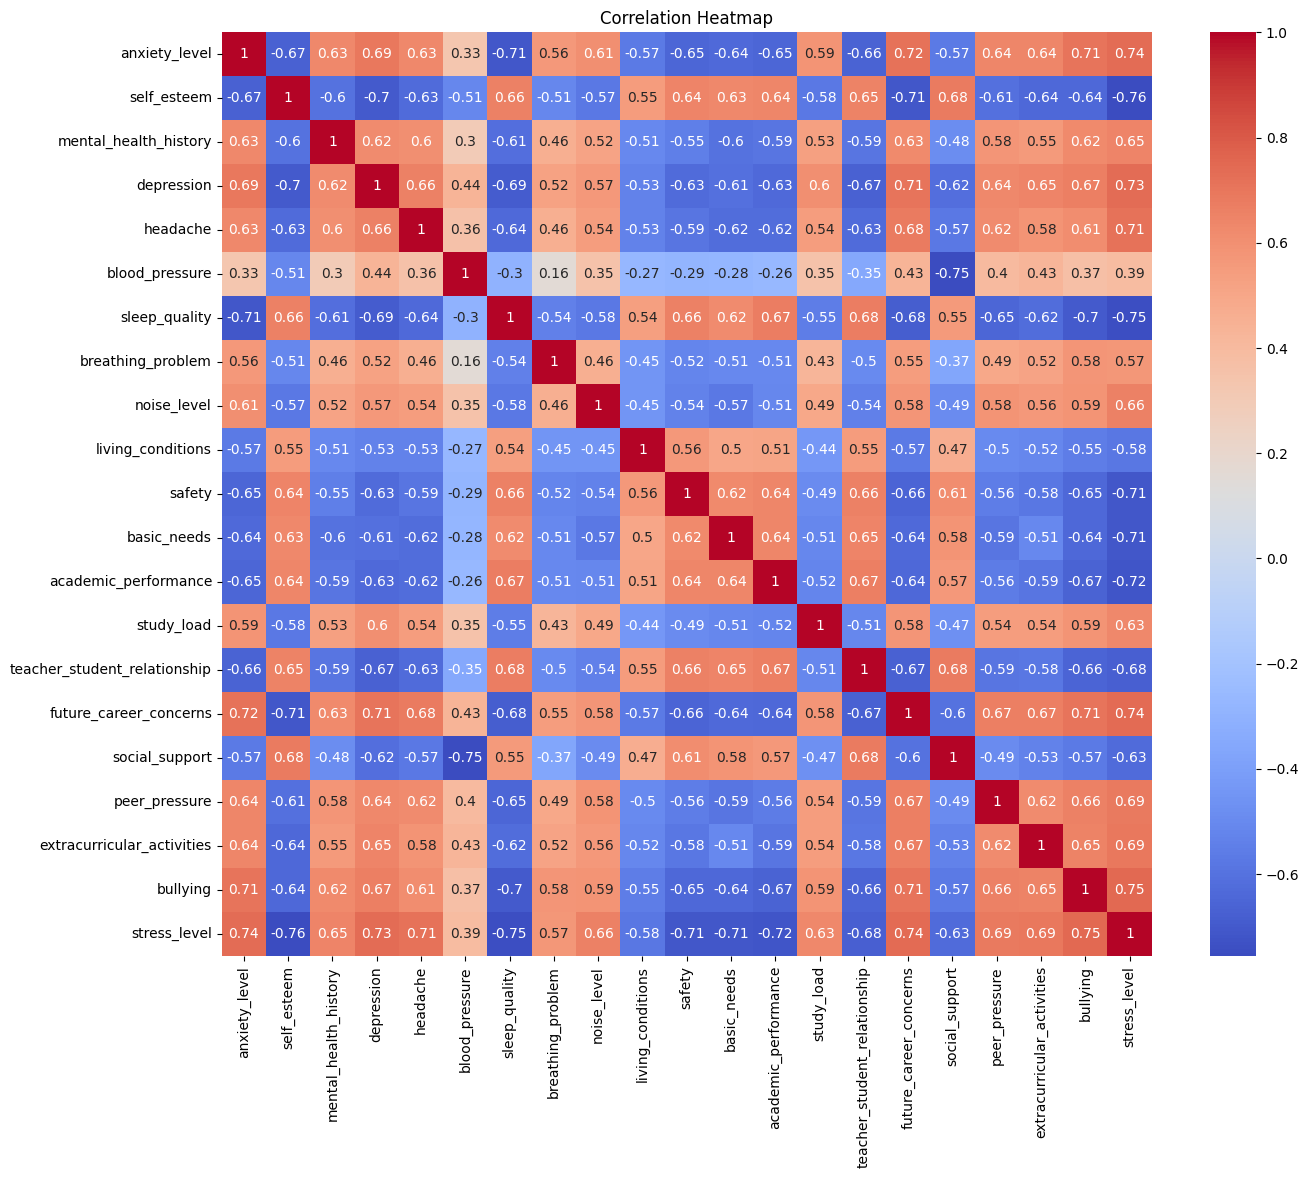

In [19]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


--- Correlation of Features with 'stress_level' ---


/tmp/ipython-input-492183627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress_correlation.values, y=stress_correlation.index, palette='viridis')


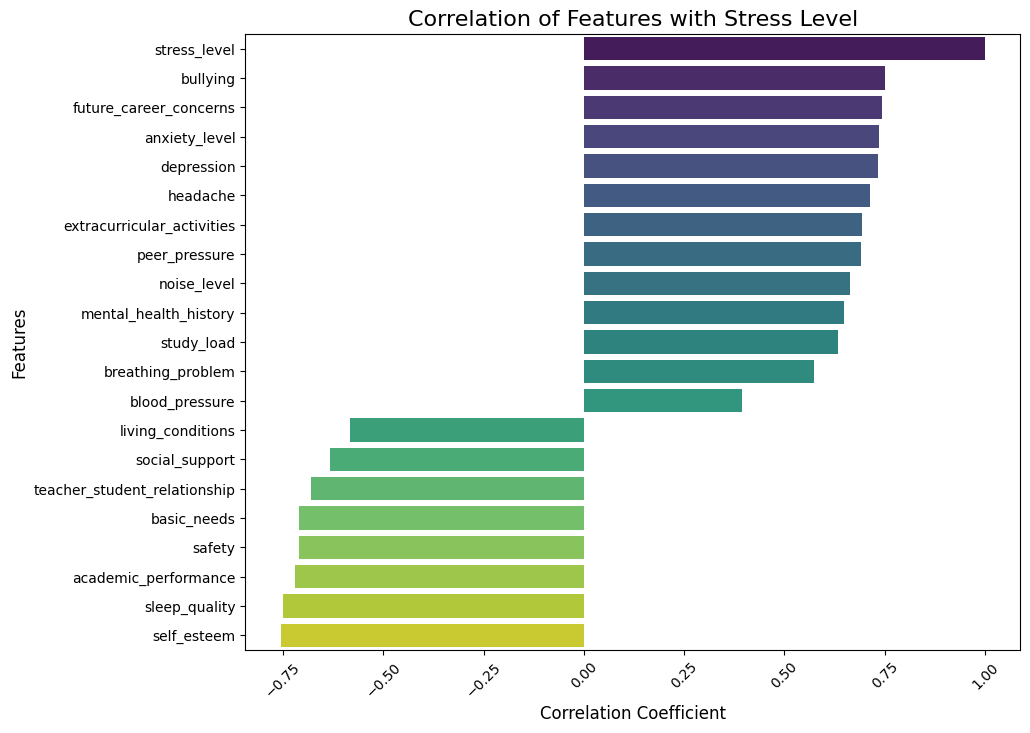

In [27]:
stress_correlation = corr_matrix['stress_level'].sort_values(ascending=False)
print("\n--- Correlation of Features with 'stress_level' ---")
plt.figure(figsize=(10, 8))
sns.barplot(x=stress_correlation.values, y=stress_correlation.index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of Features with Stress Level', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# Building Model

In [28]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Splitting Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [30]:
print("Data splitting completed.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Data splitting completed.
X_train shape: (880, 20), X_test shape: (220, 20)


# Scaling

In [45]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [46]:
models = [
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    SVC(probability=True, random_state=42)
]


In [47]:
param_grids = [
    {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7]}, # GB
    {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}, # RF
    {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, # Logistic Regression
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}, # KNN
    {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}, # Decision Tree
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} # SVC
]

# Training and Optimization

In [54]:
results = []
scoring_metric = 'f1_weighted'

print("\n--- 4.2. Starting Model Training and Optimization Process ---")

for model, param_grid in zip(models, param_grids):
    model_name = model.__class__.__name__
    print(f"\n---> Running RandomizedSearchCV for {model_name}...")

    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scoring_metric,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    rs.fit(X_train_scaled, y_train)
    y_pred = rs.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    roc_auc = np.nan
    if hasattr(rs, "predict_proba"):
        y_proba = rs.predict_proba(X_test_scaled)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    print(f"\nResults for {model_name}:")
    print(f"F1 (Weighted): {f1:.4f} | Accuracy: {acc:.4f} | Recall (Weighted): {recall:.4f} | Precision (Weighted): {precision:.4f} | ROC-AUC (OVR): {roc_auc:.4f}")
    print(f"Best Parameters: {rs.best_params_}")

    results.append([
        model_name, acc, f1, recall, precision, roc_auc, rs.best_estimator_
    ])



--- 4.2. Starting Model Training and Optimization Process ---

---> Running RandomizedSearchCV for GradientBoostingClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for GradientBoostingClassifier:
F1 (Weighted): 0.8772 | Accuracy: 0.8773 | Recall (Weighted): 0.8773 | Precision (Weighted): 0.8772 | ROC-AUC (OVR): 0.9831
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}

---> Running RandomizedSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for RandomForestClassifier:
F1 (Weighted): 0.8774 | Accuracy: 0.8773 | Recall (Weighted): 0.8773 | Precision (Weighted): 0.8786 | ROC-AUC (OVR): 0.9834
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}

---> Running RandomizedSearchCV for LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for LogisticRegression:
F1 (Weighted): 0.8864 | Accuracy: 0.8864 | Recall (Weighted): 0.8864 | Precision (Weighted): 0.8866 | ROC-AUC (OVR): 0.9782
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}

---> Running RandomizedSearchCV for KNeighborsClassifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for KNeighborsClassifier:
F1 (Weighted): 0.8500 | Accuracy: 0.8500 | Recall (Weighted): 0.8500 | Precision (Weighted): 0.8501 | ROC-AUC (OVR): 0.9480
Best Parameters: {'weights': 'distance', 'n_neighbors': 3}

---> Running RandomizedSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for DecisionTreeClassifier:
F1 (Weighted): 0.8504 | Accuracy: 0.8500 | Recall (Weighted): 0.8500 | Precision (Weighted): 0.8534 | ROC-AUC (OVR): 0.9772
Best Parameters: {'min_samples_split': 10, 'max_depth': 5}

---> Running RandomizedSearchCV for SVC...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for SVC:
F1 (Weighted): 0.8640 | Accuracy: 0.8636 | Recall (Weighted): 0.8636 | Precision (Weighted): 0.8652 | ROC-AUC (OVR): 0.9807
Best Parameters: {'kernel': 'rbf', 'C': 10}


In [56]:
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy', 'F1', 'Recall', 'Precision', 'ROC-AUC', 'Best Estimator']
).sort_values(by='F1', ascending=False).reset_index(drop=True)


In [59]:
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_score = best_model_row['F1']

print("\n\n--- 4.3. COMPARISON TABLE FOR ALL MODELS ---")
print(results_df[['Model', 'Accuracy', 'F1', 'Recall', 'Precision', 'ROC-AUC']])





--- 4.3. COMPARISON TABLE FOR ALL MODELS ---
                        Model  Accuracy        F1    Recall  Precision  \
0          LogisticRegression  0.886364  0.886436  0.886364   0.886564   
1      RandomForestClassifier  0.877273  0.877372  0.877273   0.878579   
2  GradientBoostingClassifier  0.877273  0.877213  0.877273   0.877210   
3                         SVC  0.863636  0.863981  0.863636   0.865190   
4      DecisionTreeClassifier  0.850000  0.850360  0.850000   0.853381   
5        KNeighborsClassifier  0.850000  0.850019  0.850000   0.850091   

    ROC-AUC  
0  0.978214  
1  0.983395  
2  0.983085  
3  0.980713  
4  0.977163  
5  0.947964  


# Best Model = Logistic regression

In [60]:
print(f"\nBest Model by F1-Score: {best_model_name} (F1-Score: {best_score:.4f})")


Best Model by F1-Score: LogisticRegression (F1-Score: 0.8864)


In [61]:
print("\n--- 5.4. Classification Report ---")
report = classification_report(y_test, y_pred_best)
print(f"--- Classification Report for {best_model_name} ---")
print(report)

print("\n--- 6.1. Saving the Final Model ---")
model_filename = 'stress_level_classifier_model.joblib'
joblib.dump(best_model, model_filename)
print(f"Best model successfully saved as '{model_filename}'")



--- 5.4. Classification Report ---
--- Classification Report for LogisticRegression ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.88      0.88      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220


--- 6.1. Saving the Final Model ---
Best model successfully saved as 'stress_level_classifier_model.joblib'
